<a href="https://colab.research.google.com/github/NateCWB/MachineLearning/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Carregar o dataset
df_train_val = pd.read_csv('/content/student_performance_train_val.data.txt')
df_test = pd.read_csv('/content/student_performance_test.data.txt')

In [ ]:
# Análise exploratória de dados
print(df_train_val['approved'].value_counts())
print(df_train_val.info())

approved
0    427
1    408
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      835 non-null    object
 1   sex         835 non-null    object
 2   age         835 non-null    int64 
 3   address     835 non-null    object
 4   famsize     835 non-null    object
 5   Pstatus     835 non-null    object
 6   Medu        835 non-null    int64 
 7   Fedu        835 non-null    int64 
 8   Mjob        835 non-null    object
 9   Fjob        835 non-null    object
 10  reason      835 non-null    object
 11  guardian    835 non-null    object
 12  traveltime  835 non-null    int64 
 13  studytime   835 non-null    int64 
 14  failures    835 non-null    int64 
 15  schoolsup   835 non-null    object
 16  famsup      835 non-null    object
 17  paid        835 non-null    object
 18  activities  835 non-null    object
 1

In [ ]:
df_train_val.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,approved
0,GP,M,16,U,GT3,T,3,1,other,other,...,yes,no,4,3,2,1,1,5,0,1
1,GP,M,15,U,GT3,T,3,4,services,services,...,yes,no,5,5,5,3,2,5,0,1
2,GP,F,17,U,GT3,T,3,1,services,services,...,yes,no,3,4,3,2,3,5,0,1
3,GP,M,18,U,GT3,T,4,4,teacher,services,...,yes,no,4,3,3,2,2,2,0,1
4,GP,F,17,U,LE3,A,3,3,services,other,...,yes,no,5,3,3,1,1,5,0,1


In [ ]:
#Transformando texto em número
le = LabelEncoder()
for columns in df_train_val.columns:
    if df_train_val[columns].dtype == 'object':
        df_train_val[columns] = le.fit_transform(df_train_val[columns])

le = LabelEncoder()
for columns in df_test.columns:
    if df_test[columns].dtype == 'object':
        df_test[columns] = le.fit_transform(df_test[columns])

df_train_val.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,approved
0,0,1,16,1,0,1,3,1,2,2,...,1,0,4,3,2,1,1,5,0,1
1,0,1,15,1,0,1,3,4,3,3,...,1,0,5,5,5,3,2,5,0,1
2,0,0,17,1,0,1,3,1,3,3,...,1,0,3,4,3,2,3,5,0,1
3,0,1,18,1,0,1,4,4,4,3,...,1,0,4,3,3,2,2,2,0,1
4,0,0,17,1,1,0,3,3,3,2,...,1,0,5,3,3,1,1,5,0,1


In [ ]:
#Separando dados de treino e teste
X_train = df_train_val.iloc[:,:-1]
y_train = df_train_val.iloc[:,-1:]

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1:]

X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,1,16,1,0,1,3,1,2,2,...,1,1,0,4,3,2,1,1,5,0
1,0,1,15,1,0,1,3,4,3,3,...,1,1,0,5,5,5,3,2,5,0
2,0,0,17,1,0,1,3,1,3,3,...,1,1,0,3,4,3,2,3,5,0
3,0,1,18,1,0,1,4,4,4,3,...,1,1,0,4,3,3,2,2,2,0
4,0,0,17,1,1,0,3,3,3,2,...,1,1,0,5,3,3,1,1,5,0


In [ ]:
y_train.head()

,approved
0,1
1,1
2,1
3,1
4,1


In [ ]:
#Trabalhando com escala de dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train

array([[-0.59809997,  1.12650865, -0.59626737, ..., -1.01885085,
         1.04308921, -0.76203034],
       [-0.59809997,  1.12650865, -1.40583363, ..., -0.24894998,
         1.04308921, -0.76203034],
       [-0.59809997, -0.88769847,  0.21329889, ...,  0.52095089,
         1.04308921, -0.76203034],
       ...,
       [ 1.67196129, -0.88769847,  1.02286516, ..., -1.01885085,
         1.04308921, -0.76203034],
       [-0.59809997, -0.88769847,  0.21329889, ..., -0.24894998,
        -0.3583259 ,  1.3454894 ],
       [-0.59809997,  1.12650865,  0.21329889, ...,  0.52095089,
         0.34238165,  1.3454894 ]])

In [ ]:
# Treinamento de modelos
dt_model = DecisionTreeClassifier(random_state=42)
dt_model = dt_model.fit(X_train,y_train)

rf_models = []
for n_trees in [10, 50, 100]:
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_models.append(rf_model)

<ipython-input-9-8fae402155fd>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
<ipython-input-9-8fae402155fd>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)
<ipython-input-9-8fae402155fd>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


Avaliação dos modelos

Decision Tree:
Accuracy: 0.6698564593301436
Confusion Matrix:



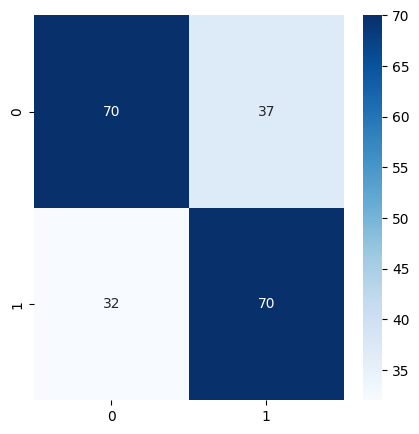

In [ ]:
#Metodo para avaliação do modelo
plt.show()
def evaluate_model(dt_model, X_test, y_test):
    y_pred = dt_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n")
    fig, axes = plt.subplots(figsize=(5,5))
    matriz = confusion_matrix(y_test, y_pred)
    sns.heatmap(matriz,annot=True,cmap='Blues',fmt='d')

#Arvore de decisão
print("Decision Tree:")
evaluate_model(dt_model, X_test, y_test)

Random Forests:
Random Forest with 10 trees:
Accuracy: 0.645933014354067
Confusion Matrix:

Random Forest with 50 trees:
Accuracy: 0.722488038277512
Confusion Matrix:

Random Forest with 100 trees:
Accuracy: 0.7129186602870813
Confusion Matrix:



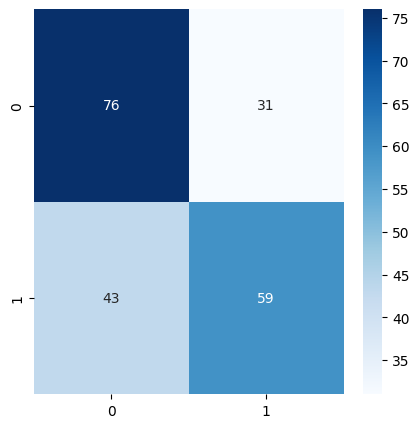

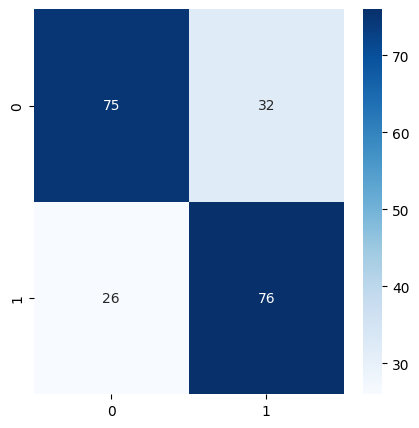

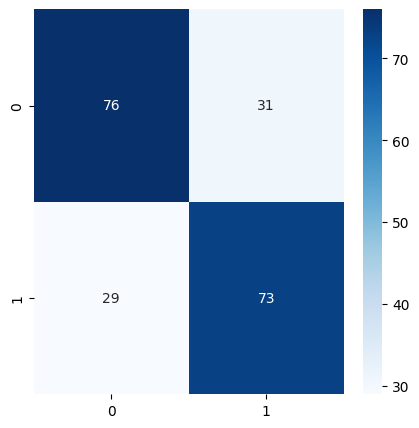

In [ ]:
#Random Forests
print("Random Forests:")
for i, rf_model in enumerate(rf_models):
    print(f"Random Forest with {rf_model.n_estimators} trees:")
    evaluate_model(rf_model, X_test, y_test)

In [ ]:
# Identificar features mais importantes
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_models[-1].feature_importances_})
print(feature_importances.sort_values('importance', ascending=False))

NameError: name 'X' is not defined